# Exploration

In [1]:
import torchvision 
import torch 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
row = df.iloc[2]

ground_truth = row.label
img_vec = np.array(row[1:])
image = np.reshape(img_vec,(28,28))


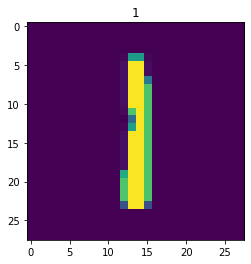

In [25]:
plt.imshow(image)
plt.title(ground_truth);

# Create a custom dataset class 

In [26]:
class DigitDataset(torch.utils.data.Dataset):

    def __init__(self, df, augmentations = None):
        super().__init__()

        self.df = df
        self.augmentations = augmentations

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        row = self.df.iloc[idx]

        label = row.label
        img_vec = np.array(row[1:])
        image = np.reshape(img_vec, (28,28,1))

        if self.augmentations:
            image = self.augmentations(image)

        return {
            'images' : image, 
            'labels' : label
        }

In [42]:
import albumentations as A 
from sklearn.model_selection import train_test_split

In [40]:
trainset = DigitDataset(train_df, augmentations=train_augs)
validset = DigitDataset(valid_df, augmentations=valid_augs)

In [41]:
image, label = trainset[0]
plt.imshow(image.permute(1,2,0))
plt.title(label)

TypeError: img should be PIL Image. Got <class 'numpy.ndarray'>

In [33]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle = True)
validloader = torch.utils.data.DataLoader(validset, batch_size=16)